In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Data loading
customer_data = pd.read_csv('/content/sample_data/QVI_purchase_behaviour.csv')
transaction_data = pd.read_excel('/content/sample_data/QVI_transaction_data.xlsx')

# Exploratory Data Analysis (EDA)

In [5]:
# Initial analysis of transaction_data
print(transaction_data.info())
print(transaction_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                   

In [6]:
# Initial analysis of customer_data
print(customer_data.info())
print(customer_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


## Preprocessing

## Transaction_data

In [7]:
# Conversion of date
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

In [8]:
transaction_data.dtypes


,0
DATE,datetime64[ns]
STORE_NBR,int64
LYLTY_CARD_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


In [9]:
# Product name analysis
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].astype(str)
words = transaction_data['PROD_NAME'].str.split(expand=True).stack()
words = words[~words.str.contains(r'\d|&')]
word_counts = words.value_counts()
print(word_counts.head(20))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
Pringles    25102
Doritos     24962
Crinkle     23960
Corn        22063
Original    21560
Cut         20754
Chip        18645
Salsa       18094
Chicken     15407
Sea         14145
Thins       14075
Sour        13882
Crisps      12607
Vinegar     12402
Chilli      12389
Name: count, dtype: int64


In [10]:
# Filtering Salsa
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains("salsa", case=False)]
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [11]:
# Let's look at the statistics
print(transaction_data.describe())

                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%    1.351830e+05      

In [12]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


No missing values

In [13]:
# Let's plot box plots to identify outliers.
def box(x):

  '''Function for plotting box plots.
  Input:
  x - Feature
  Output:
  Box plot by feature'''

  plt.figure(figsize=(8, 6))
  sns.boxplot(x=transaction_data[x])
  plt.show()

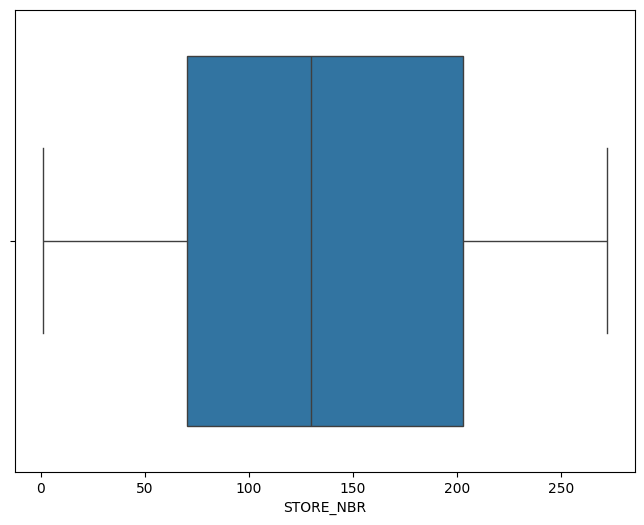

In [14]:
box('STORE_NBR')

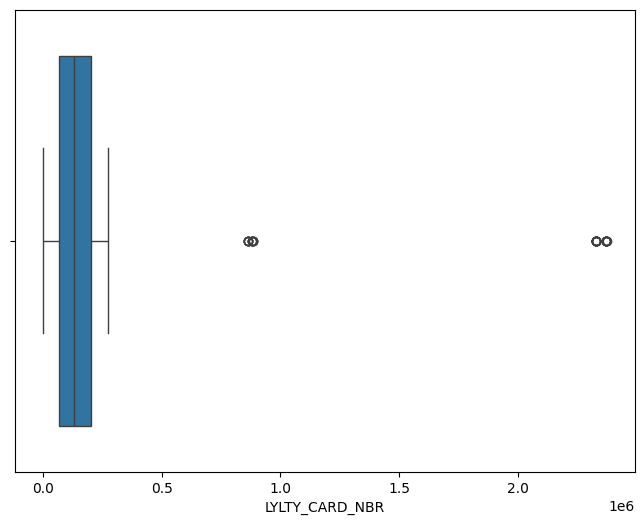

In [15]:
box('LYLTY_CARD_NBR')

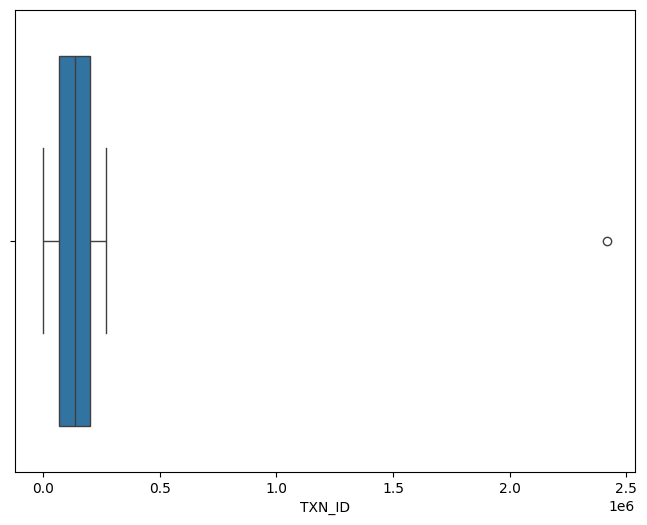

In [16]:
box('TXN_ID')

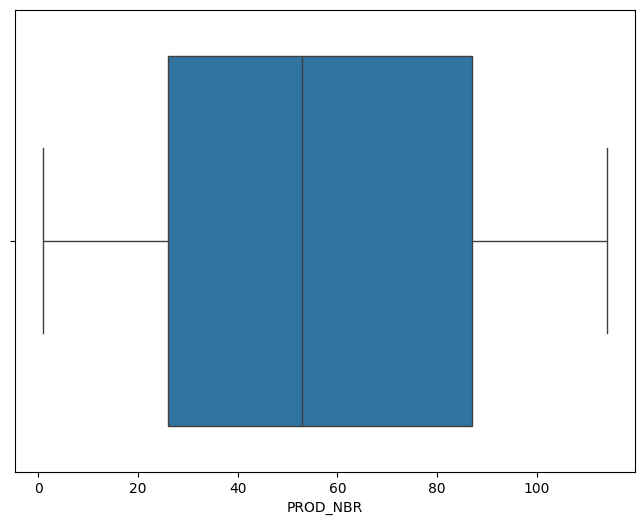

In [17]:
box('PROD_NBR')

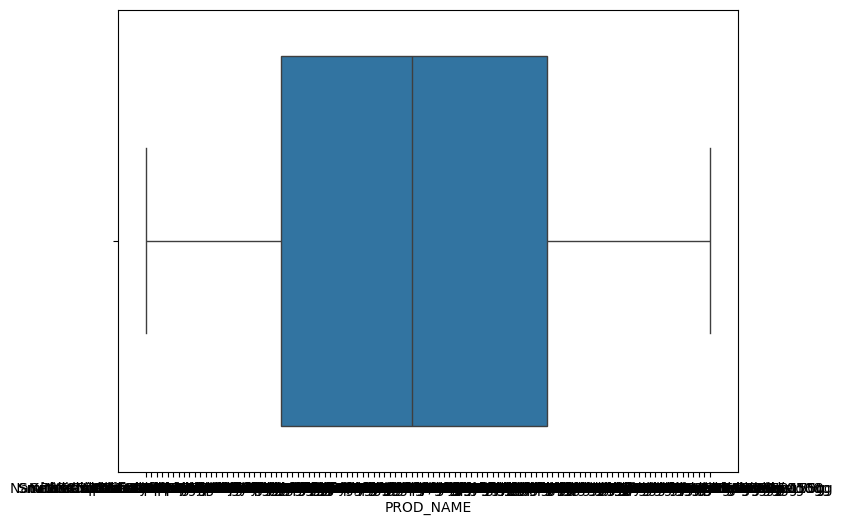

In [18]:
box('PROD_NAME')

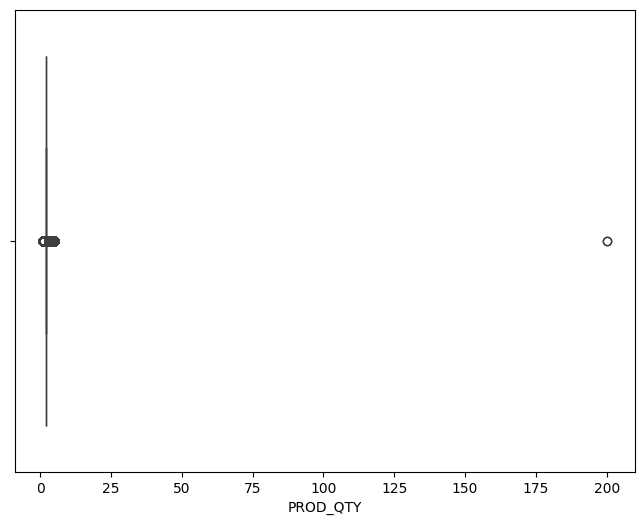

In [19]:
box('PROD_QTY')

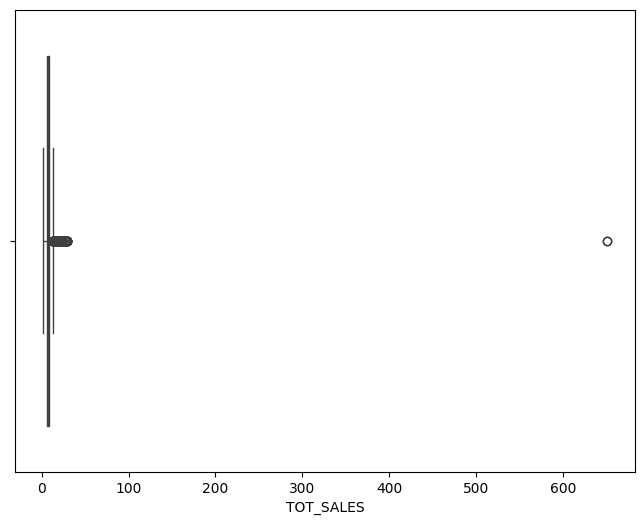

In [20]:
box('TOT_SALES')

There are no nulls in the columns but product quantity appears to have an outlier
which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.

In [21]:
# Searching for anomalous purchases
outlier_transactions = transaction_data[transaction_data['PROD_QTY'] == 200]
print(outlier_transactions)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.


In [22]:
# Exclusion of the anomalous customer
excluded_customer = outlier_transactions['LYLTY_CARD_NBR'].values[0]
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != excluded_customer]

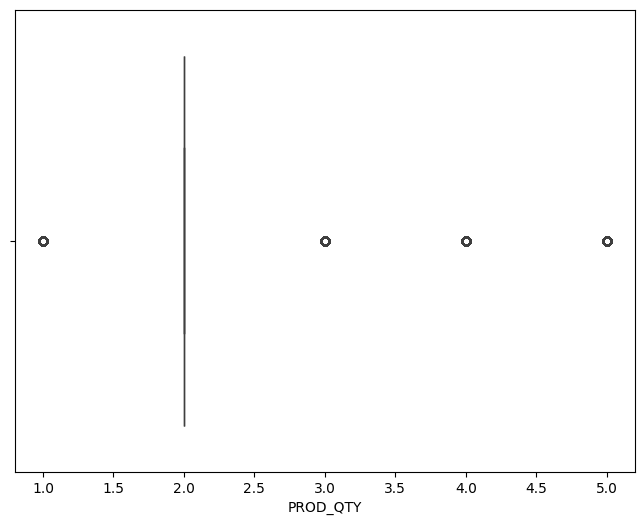

In [23]:
box('PROD_QTY')

In [24]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


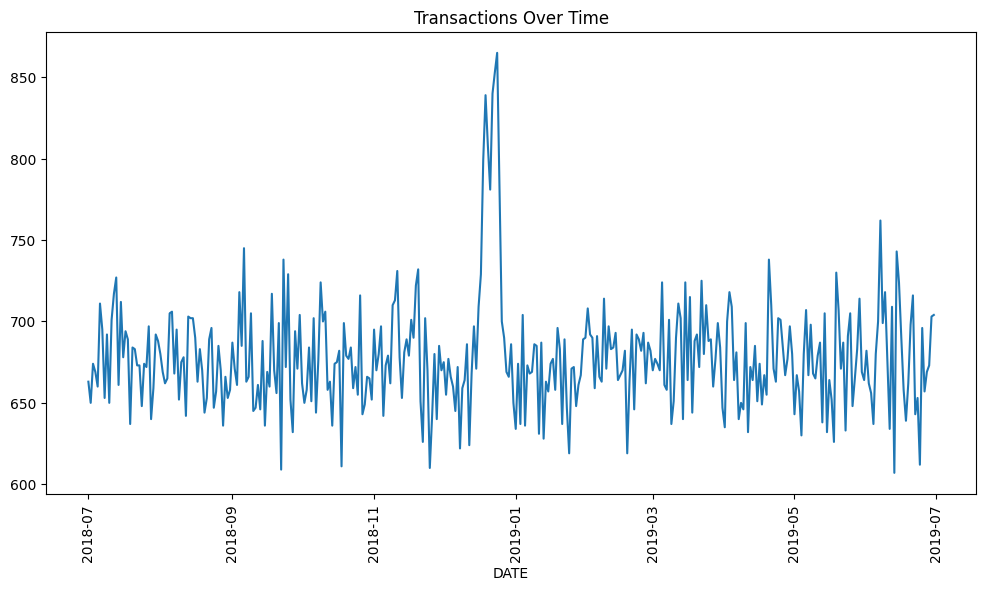

In [25]:
# Time Series Analysis
transaction_counts = transaction_data.groupby('DATE').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=transaction_counts.index, y=transaction_counts.values)
plt.xticks(rotation=90)
plt.title("Transactions Over Time")
plt.show()

Searching for the missing date from late December to January

In [26]:
# Creating a complete date range
full_date_range = pd.date_range(start='2018-07-01', end='2019-06-30')

# Getting unique dates from the data
existing_dates = pd.to_datetime(transaction_data['DATE'].unique())

# Finding the missing date
missing_dates = full_date_range.difference(existing_dates)

print("Missing date:", missing_dates)

Missing date: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.


<ipython-input-27-902f829ff635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)


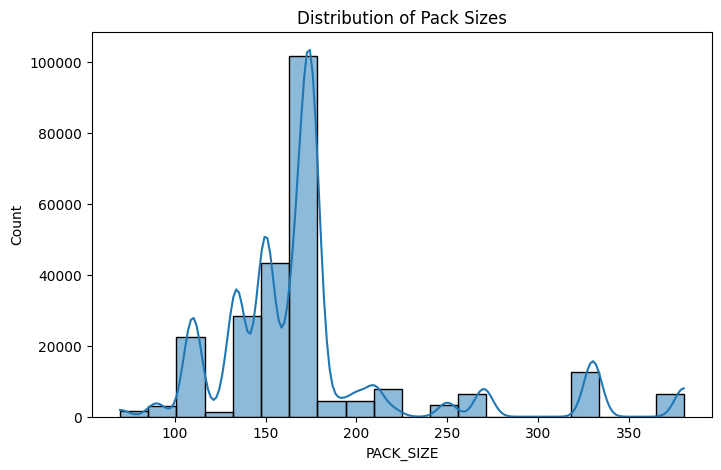

In [27]:
# Adding Pack Size
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)

# Histogram of Pack Sizes
plt.figure(figsize=(8, 5))
sns.histplot(transaction_data['PACK_SIZE'], bins=20, kde=True)
plt.title("Distribution of Pack Sizes")
plt.show()

Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.

In [28]:
# Brand Analysis
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({'Red': 'RRD'})
print(transaction_data['BRAND'].value_counts())

<ipython-input-28-94d22f5b6dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]


BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
RRD           16321
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64


In [29]:
# There are duplicate brands under different names in the dataset. Let's merge them.
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({'Smiths': 'Smith'})
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({'Infzns': 'Infuzions'})
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({'Dorito': 'Doritos'})
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({'CCs': 'Cheetos'})
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({'Snbts': 'Sunbites'})
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({'WW': 'Woolworths'})

In [30]:
print(transaction_data['BRAND'].value_counts())

BRAND
Kettle        41288
Smith         30353
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Cheetos        7478
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
Sunbites       3008
Burger         1564
GrnWves        1468
NCC            1419
French         1418
Name: count, dtype: int64


## Customer_data

In [31]:
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [32]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Пропусков нет

In [33]:
customer_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [34]:
customer_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [35]:
# Statistics
print(customer_data.describe(include='all'))

        LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN


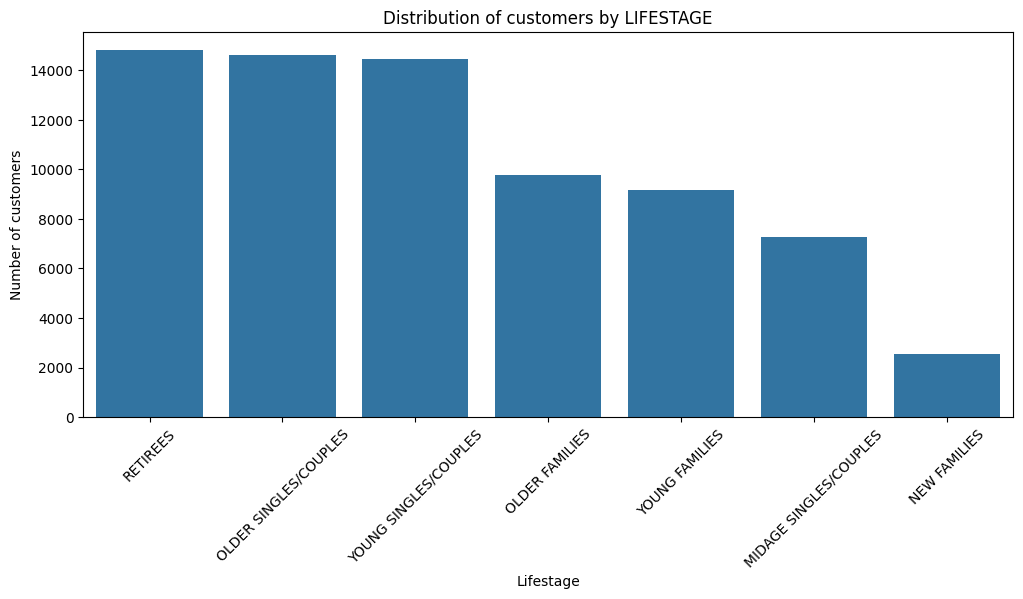

In [36]:
# Histogram by LIFESTAGE
plt.figure(figsize=(12, 5))
sns.countplot(data=customer_data, x='LIFESTAGE', order=customer_data['LIFESTAGE'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of customers by LIFESTAGE')
plt.xlabel('Lifestage')
plt.ylabel('Number of customers')
plt.show()

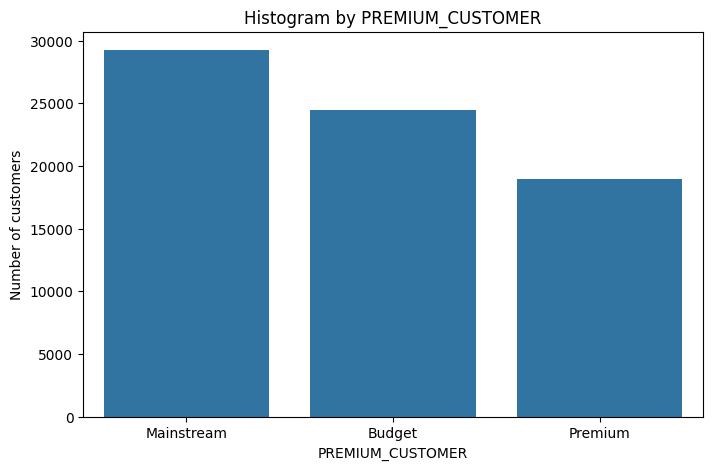

In [37]:
# Histogram by PREMIUM_CUSTOMER
plt.figure(figsize=(8, 5))
sns.countplot(data=customer_data, x='PREMIUM_CUSTOMER', order=customer_data['PREMIUM_CUSTOMER'].value_counts().index)
plt.title('Histogram by PREMIUM_CUSTOMER')
plt.xlabel('PREMIUM_CUSTOMER')
plt.ylabel('Number of customers')
plt.show()

## Merging tables

In [38]:
# Merging tables
merged_data = transaction_data.merge(customer_data, on='LYLTY_CARD_NBR', how='left')

# Checking for missing values
print(merged_data.isna().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [39]:
# Check the dataset for duplicates
merged_data.duplicated().sum()

1

In [40]:
# Remove duplicates
merged_data = merged_data.drop_duplicates()

In [41]:
merged_data.duplicated().sum()

0

In [42]:
# Saving the DataFrame to a CSV file
merged_data.to_csv("dataset.csv", index=False)

## Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
We could also ask our data team for more information. Examples are:
- The customer's total spend over the period and total spend for each transaction
to understand what proportion of their grocery spend is on chips
- Proportion of customers in each customer segment overall to compare against the
mix of customers who purchase chips

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.

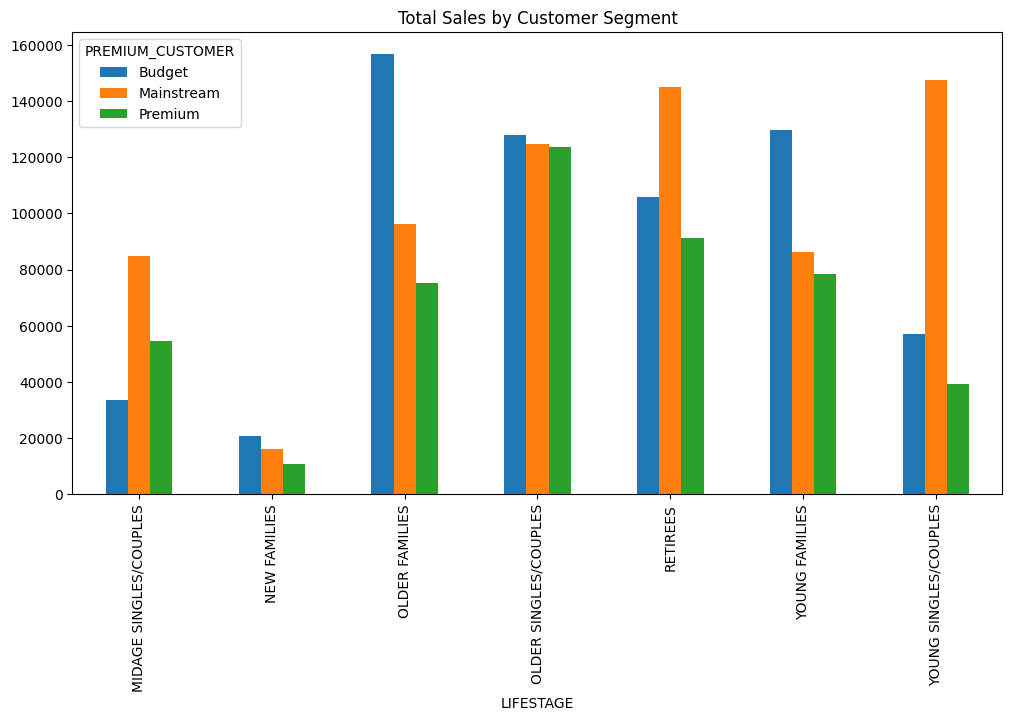

In [43]:
# Sales Analysis by Segments
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
sales_by_segment.plot(kind='bar', figsize=(12, 6))
plt.title("Total Sales by Customer Segment")
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees.

Let's see if the higher sales are due to there being more customers who buy chips.

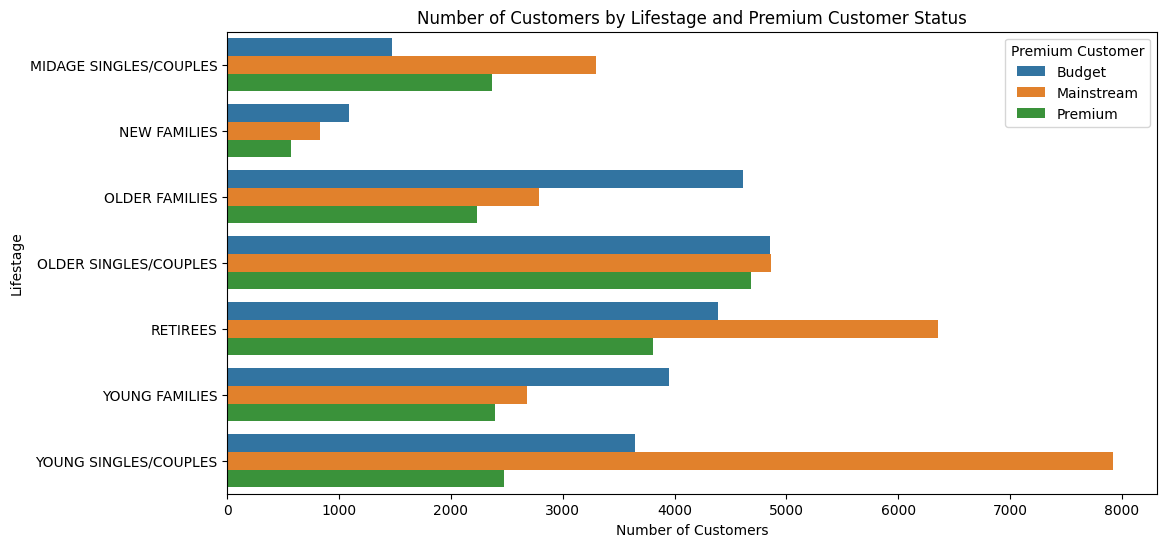

In [44]:
customer_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

customer_summary.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'NUM_CUSTOMERS']

plt.figure(figsize=(12, 6))
sns.barplot(x='NUM_CUSTOMERS', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=customer_summary)
plt.title('Number of Customers by Lifestage and Premium Customer Status')
plt.xlabel('Number of Customers')
plt.ylabel('Lifestage')
plt.legend(title='Premium Customer')
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees
Let's see if the higher sales are due to there being more customers who buy chips.

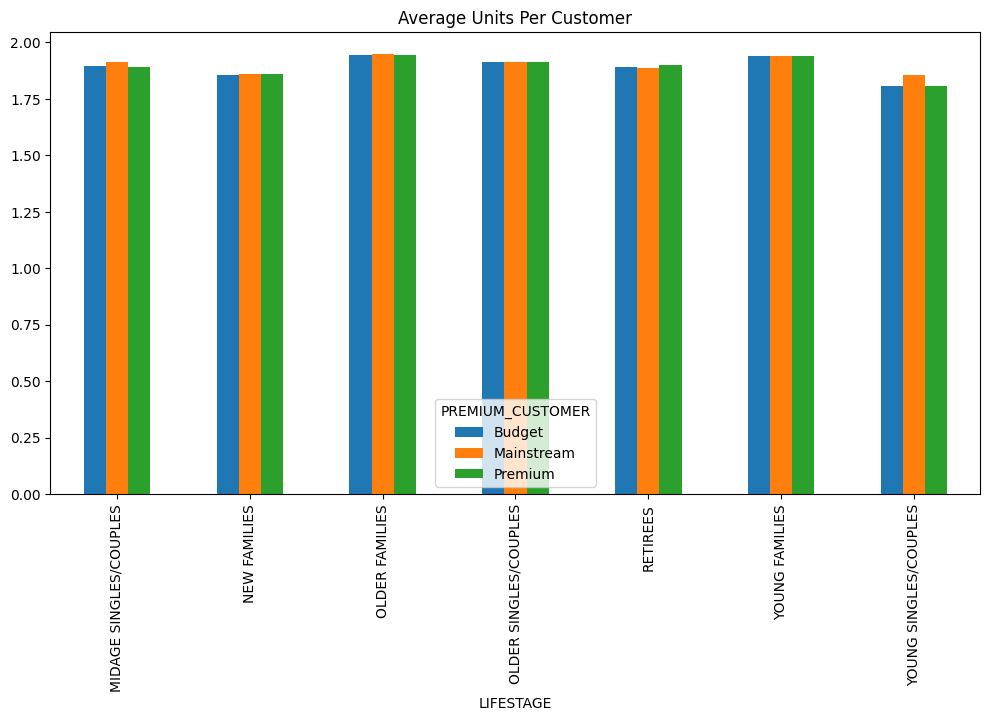

In [45]:
# Analysis of the Average Number of Units per Customer
units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().unstack()
units_per_customer.plot(kind='bar', figsize=(12, 6))
plt.title("Average Units Per Customer")
plt.show()


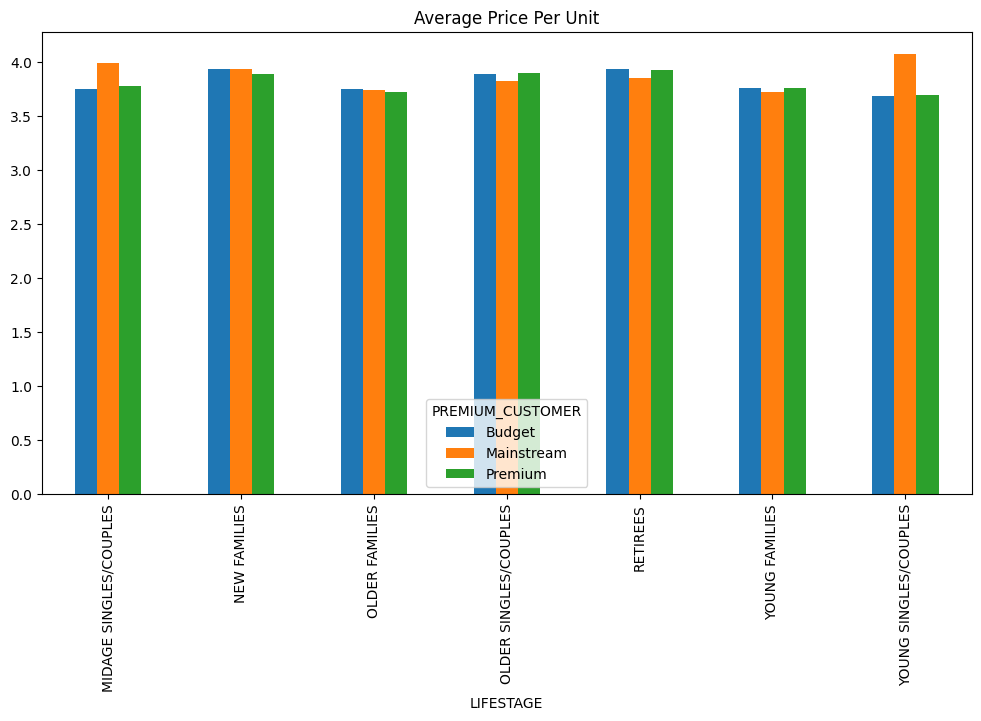

In [46]:
# Average Price Per Unit
price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
price_per_unit.unstack().plot(kind='bar', figsize=(12, 6))
plt.title("Average Price Per Unit")
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.
As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [47]:
# T-test
mainstream_prices = merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Mainstream']['TOT_SALES'] / merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Mainstream']['PROD_QTY']
premium_prices = merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Premium']['TOT_SALES'] / merged_data[merged_data['PREMIUM_CUSTOMER'] == 'Premium']['PROD_QTY']
t_stat, p_value = stats.ttest_ind(mainstream_prices, premium_prices, equal_var=False)
print(f"T-test p-value: {p_value}")

T-test p-value: 2.1341577623239627e-28


A p-value of 2.13 × 10⁻²⁸ (very small) means that the difference in average unit price between mainstream young/mid-age singles and couples and budget/premium young/mid-age singles and couples is statistically significant.

In other words, we can confidently reject the null hypothesis that the average unit price is the same for all these groups. This indicates that mainstream young and mid-age singles/couples indeed buy chips at a higher price compared to their budget and premium counterparts.

## Deep dive into Mainstream, young singles/couples

In [48]:
!pip install mlxtend

In [49]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,Cheetos,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smith,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smith,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [50]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [58]:
mainstream_young = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

In [61]:
mainstream_young.shape

(19544, 12)

In [62]:
# Creating a transaction table in one-hot encoding format
basket = mainstream_young.groupby(['LYLTY_CARD_NBR', 'BRAND'])['TOT_SALES'].sum().unstack().fillna(0)
basket = (basket > 0).astype(int)

In [63]:
print(basket.sum().sum())

17204


In [64]:
# Running the Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [65]:
frequent_itemsets

,support,itemsets
0,0.103827,(Cobs)
1,0.260326,(Doritos)
2,0.070102,(Grain)
3,0.143110,(Infuzions)
4,0.387142,(Kettle)
5,0.256158,(Pringles)
6,0.093975,(RRD)
7,0.202476,(Smith)
8,0.136036,(Thins)
9,0.105848,(Tostitos)


This is a DataFrame with the following columns:

 - itemsets — which items are frequently purchased together

 - support — the proportion of transactions in which this itemset appears

In [68]:
# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Sort by lift (the higher the value, the stronger the association).
rules = rules.sort_values(by="lift", ascending=False)

# Display the top 10 associations.
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

   antecedents consequents   support  confidence      lift
11    (Kettle)     (Thins)  0.051282    0.132463  0.973734
10     (Thins)    (Kettle)  0.051282    0.376973  0.973734
5      (Smith)   (Doritos)  0.051156    0.252651  0.970519
4    (Doritos)     (Smith)  0.051156    0.196507  0.970519
8      (Smith)    (Kettle)  0.075660    0.373674  0.965214
9     (Kettle)     (Smith)  0.075660    0.195432  0.965214
2    (Doritos)  (Pringles)  0.062650    0.240660  0.939499
3   (Pringles)   (Doritos)  0.062650    0.244576  0.939499
6   (Pringles)    (Kettle)  0.091449    0.357002  0.922148
7     (Kettle)  (Pringles)  0.091449    0.236215  0.922148


Associations between chip brands that are frequently purchased together have been found.

**Table Interpretation:**
1. Antecedents (left element) – A product whose purchase may predict the purchase of another.
2. Consequents (right element) – A product that is likely to be bought together with the antecedent.
3. Support – The proportion of transactions that contain this itemset.
4. Confidence – The probability that if a customer buys the antecedent, they will also buy the consequent.
5. Lift – How much stronger the relationship between the products is compared to random coincidence. A lift > 1 means that buying one product truly increases the likelihood of buying the other.

**Key Findings:**
Kettle and Thins are often bought together (lift = 0.97).

 - If a customer buys Kettle, the probability of buying Thins is 13.2%.
 - If a customer buys Thins, the probability of buying Kettle is 37.7%.

Smith and Doritos frequently appear in the same purchase (lift = 0.97).

 - If a customer buys Smith, they will buy Doritos in 25.2% of cases.
 - If a customer buys Doritos, they will buy Smith in 19.6% of cases.

Pringles, Kettle, and Doritos form strong associations:

 - Pringles and Kettle are often bought together (lift = 0.92).
 - Pringles and Doritos are also frequently paired (lift = 0.94).

**What to Do with These Insights?**

Recommendations & Marketing:

If a customer buys Kettle, offer them a discount on Thins.
If a customer buys Smith, suggest Doritos as an additional purchase.

**Optimizing Product Placement:**

Place Kettle and Thins next to each other on store shelves.
Do the same for Smith and Doritos to encourage joint purchases.

## Let's also find out if our target segment tends to buy larger packs of chips.


In [69]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,Cheetos,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smith,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smith,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [70]:
target_segment  = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

In [71]:
# Calculating the average pack size by segments
pack_size_summary = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PACK_SIZE'].mean().reset_index()
pack_size_summary

,LIFESTAGE,PREMIUM_CUSTOMER,PACK_SIZE
0,MIDAGE SINGLES/COUPLES,Budget,174.182690
1,MIDAGE SINGLES/COUPLES,Mainstream,177.898693
2,MIDAGE SINGLES/COUPLES,Premium,174.585391
3,NEW FAMILIES,Budget,174.766643
4,NEW FAMILIES,Mainstream,175.629748
5,NEW FAMILIES,Premium,175.245296
6,OLDER FAMILIES,Budget,175.546342
7,OLDER FAMILIES,Mainstream,175.175666
8,OLDER FAMILIES,Premium,174.524752
9,OLDER SINGLES/COUPLES,Budget,175.334673


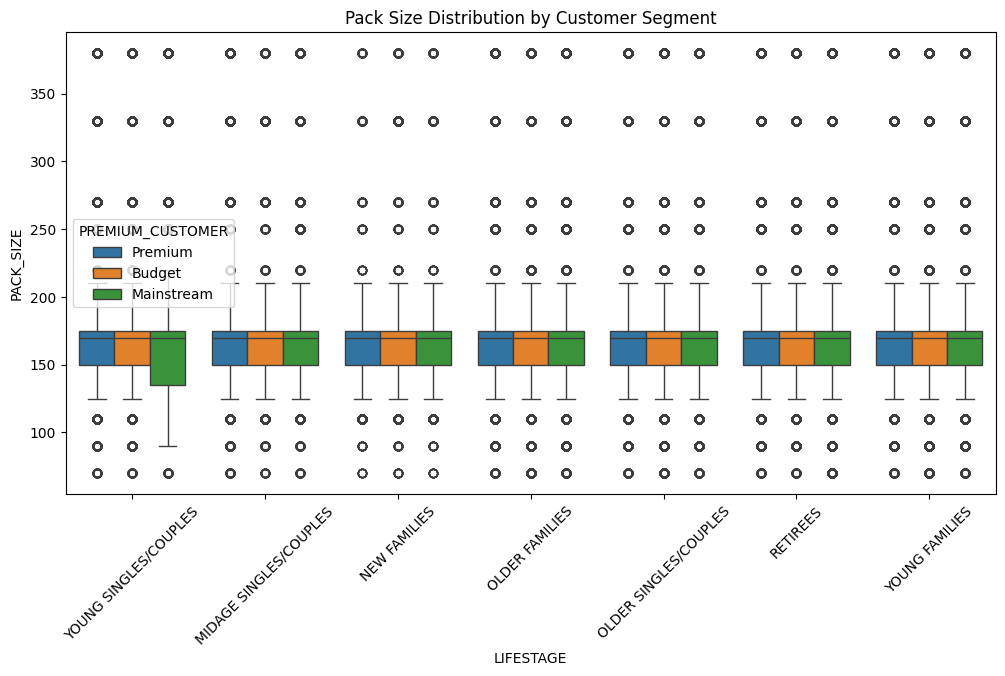

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="LIFESTAGE", y="PACK_SIZE", hue="PREMIUM_CUSTOMER", data=merged_data)
plt.xticks(rotation=45)
plt.title("Pack Size Distribution by Customer Segment")
plt.show()

In each segment, the average pack size is approximately the same (around 150g).
The "Mainstream – YOUNG SINGLES/COUPLES" segment (green) does not show a noticeable tendency to buy larger packs compared to other segments.
Pack sizes are distributed similarly across all segments. Let's perform a t-test.

In [75]:
# T-test - comparing the pack size in the target segment with the rest.
other_segments = merged_data[
    ~((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
      (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream'))
]

t_stat, p_val = stats.ttest_ind(target_segment['PACK_SIZE'], other_segments['PACK_SIZE'], nan_policy='omit')

print(f"T-test p-value: {p_val}")
if p_val < 0.05:
    print("The target segment differs significantly in pack size.")
else:
    print("There is no significant difference in pack size between segments.")

T-test p-value: 1.3077391598910532e-11
The target segment differs significantly in pack size.


Such a small p-value (≈1.31e-11) indicates that the difference in pack sizes between the target segment "Mainstream - Young Singles/Couples" and the comparison segments is statistically significant.

**Conclusion:**

The target segment indeed prefers a different pack size compared to other groups.